<center><img src="http://milestonetechs.com/media/filer_public_thumbnails/filer_public/24/26/24260fc4-2637-4348-b2bd-3c333f2f806d/python_logo.jpg__800x250_q85_crop_subsampling-2.jpg" width="1000"></center>

# Programa de Especialización en Python

## Tema 2. Métodos de particionamiento: código

### Prof. Manuel Sigüeñas, M.Sc.(c)
[msguenas@socialdata-peru.com](msguenas@socialdata-peru.com)

<a id='beginning'></a>

- [Agrupamiento por k-means](#part1)
- [Agrupamiento con método jerárquico](#part2)
- [Localización de regiones de alta densidad a través de DBSCAN](#part3)

In [1]:
%load_ext watermark
%watermark -a "Social Data Consulting" -u -d -v -p numpy,pandas,matplotlib,scipy,sklearn

Social Data Consulting 
last updated: 2019-09-28 

CPython 3.7.3
IPython 7.4.0

numpy 1.16.2
pandas 0.24.2
matplotlib 3.0.3
scipy 1.2.1
sklearn 0.21.3


<br>
<br>

In [40]:
from IPython.display import Image
%matplotlib inline

<a id='part1'></a>
## Agrupamiento por k-means

##### Usando el agrupamiento K-means con scikit-learn

In [41]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=150, #(default=100) número de instancias
                  n_features=2, #número de características
                  centers=3, # los centros de los clúster
                  cluster_std=0.5, #desviación estándar de los clúster
                  shuffle=True, #realizar el proceso aleatorio
                  random_state=0) #semilla

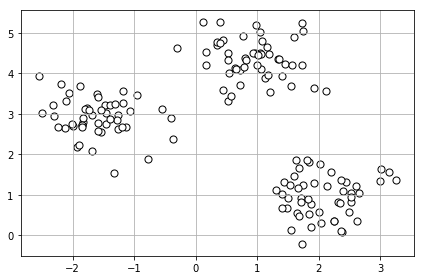

In [42]:
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1], 
            c='white', marker='o', edgecolor='black', s=50)
plt.grid()
plt.tight_layout()
plt.show()

In [44]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, #número de grupos a formar
            init='random', #elija k observaciones (filas) para los centroides iniciales
            n_init=10, #número de veces que el algoritmo se ejecutará
            max_iter=300, #número máximo de iteraciones para una ejecución
            tol=1e-04, #tolerancia para declarar convergencia
            random_state=0) #semilla

y_km = km.fit_predict(X)

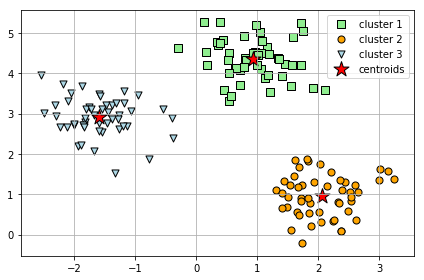

In [6]:
plt.scatter(X[y_km == 0, 0],
            X[y_km == 0, 1],
            s=50, c='lightgreen',
            marker='s', edgecolor='black',
            label='cluster 1')
plt.scatter(X[y_km == 1, 0],
            X[y_km == 1, 1],
            s=50, c='orange',
            marker='o', edgecolor='black',
            label='cluster 2')
plt.scatter(X[y_km == 2, 0],
            X[y_km == 2, 1],
            s=50, c='lightblue',
            marker='v', edgecolor='black',
            label='cluster 3')
plt.scatter(km.cluster_centers_[:, 0],
            km.cluster_centers_[:, 1],
            s=250, marker='*',
            c='red', edgecolor='black',
            label='centroids')
plt.legend(scatterpoints=1)
plt.grid()
plt.tight_layout()
plt.show()

<br>

##### Una forma más inteligente de ubicar los centroides del clúster inicial utilizando k-means++

...

##### Agrupación dura vs blanda

...

##### Utilizando el método del codo para encontrar el número óptimo de clúster

In [7]:
print('Distortion: %.2f' % km.inertia_)

Distortion: 72.48


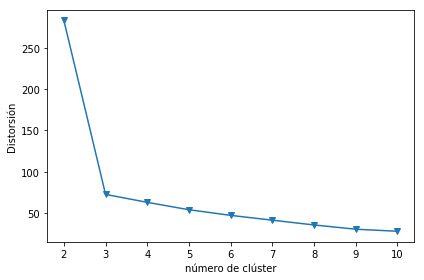

In [46]:
distortions = []
for i in range(2, 11): #bucle de 2 a 11
    km = KMeans(n_clusters=i, #número de clúster a formar 
                init='k-means++', #elija k observaciones (filas) para los centroides iniciales
                n_init=10, #número de veces que el algoritmo se ejecutará
                max_iter=300, #número máximo de iteraciones para una ejecución
                random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)
plt.plot(range(2, 11), #valores a mostrar
         distortions, #objeto a mostrar
         marker='v') #marcador
plt.xlabel('número de clúster')
plt.ylabel('Distorsión')
plt.tight_layout()
plt.show()

<br>

##### Cuantificando la calidad de agrupamiento  mediante gráfico de silueta 

In [47]:
import numpy as np
from matplotlib import cm
from sklearn.metrics import silhouette_samples

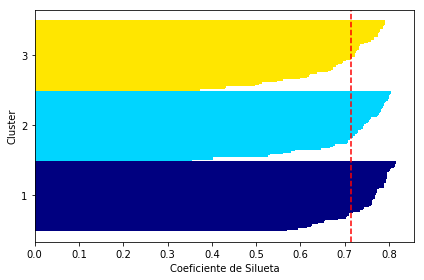

In [17]:
km = KMeans(n_clusters=3, 
            init='k-means++',  #elija k observaciones (filas) para los centroides iniciales
            n_init=10, #número de veces que el algoritmo se ejecutará
            max_iter=300, #número máximo de iteraciones para una ejecución
            tol=1e-04, #tolerancia para declarar convergencia
            random_state=0) #semilla
y_km = km.fit_predict(X)

cluster_labels = np.unique(y_km) #valores de clúster
n_clusters = cluster_labels.shape[0] #núnero de clústers
silhouette_vals = silhouette_samples(X, y_km, metric='euclidean') #valores de silueta teniendo en cuenta la distancia euclideana
silhouette_vals
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, 
             edgecolor='none', color=color)

    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
 
silhouette_avg = np.mean(silhouette_vals)#media de los valores de silueta
plt.axvline(silhouette_avg, color="red", linestyle="--") # mostrar una línea con los valores medios de silueta

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Coeficiente de Silueta')

plt.tight_layout()
plt.show()

Comparación con la agrupación "mala":

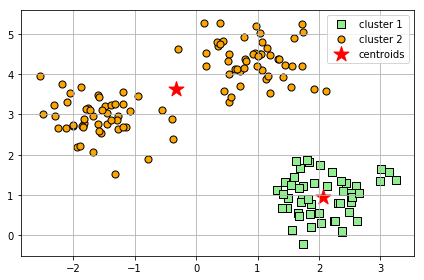

In [18]:
km = KMeans(n_clusters=2,
            init='k-means++', #elija k observaciones (filas) para los centroides iniciales
            n_init=10, #número de veces que el algoritmo se ejecutará
            max_iter=300,#número máximo de iteraciones para una ejecución
            tol=1e-04, #tolerancia para declarar convergencia
            random_state=0) #semilla
y_km = km.fit_predict(X)

plt.scatter(X[y_km == 0, 0], #primer clúster
            X[y_km == 0, 1],
            s=50,
            c='lightgreen',
            edgecolor='black',
            marker='s',
            label='cluster 1')
plt.scatter(X[y_km == 1, 0], #segundo clúster
            X[y_km == 1, 1],
            s=50,
            c='orange',
            edgecolor='black',
            marker='o',
            label='cluster 2')

plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
            s=250, marker='*', c='red', label='centroids')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

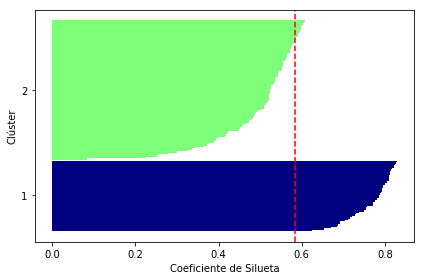

In [19]:
cluster_labels = np.unique(y_km) #valores de clúster
n_clusters = cluster_labels.shape[0] #núnero de clústers
silhouette_vals = silhouette_samples(X, y_km, metric='euclidean') #valores de silueta teniendo en cuenta la distancia euclideana
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, 
             edgecolor='none', color=color)

    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
    
silhouette_avg = np.mean(silhouette_vals) #media de los valores de silueta
plt.axvline(silhouette_avg, color="red", linestyle="--") # mostrar una línea con los valores medios de silueta

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Clúster')
plt.xlabel('Coeficiente de Silueta')

plt.tight_layout()
plt.show()

<br>
<br>

<a id='part2'></a>
## Agrupamiento con método jerárquico

##### Agrupamiento clusters de abajo hacia arriba

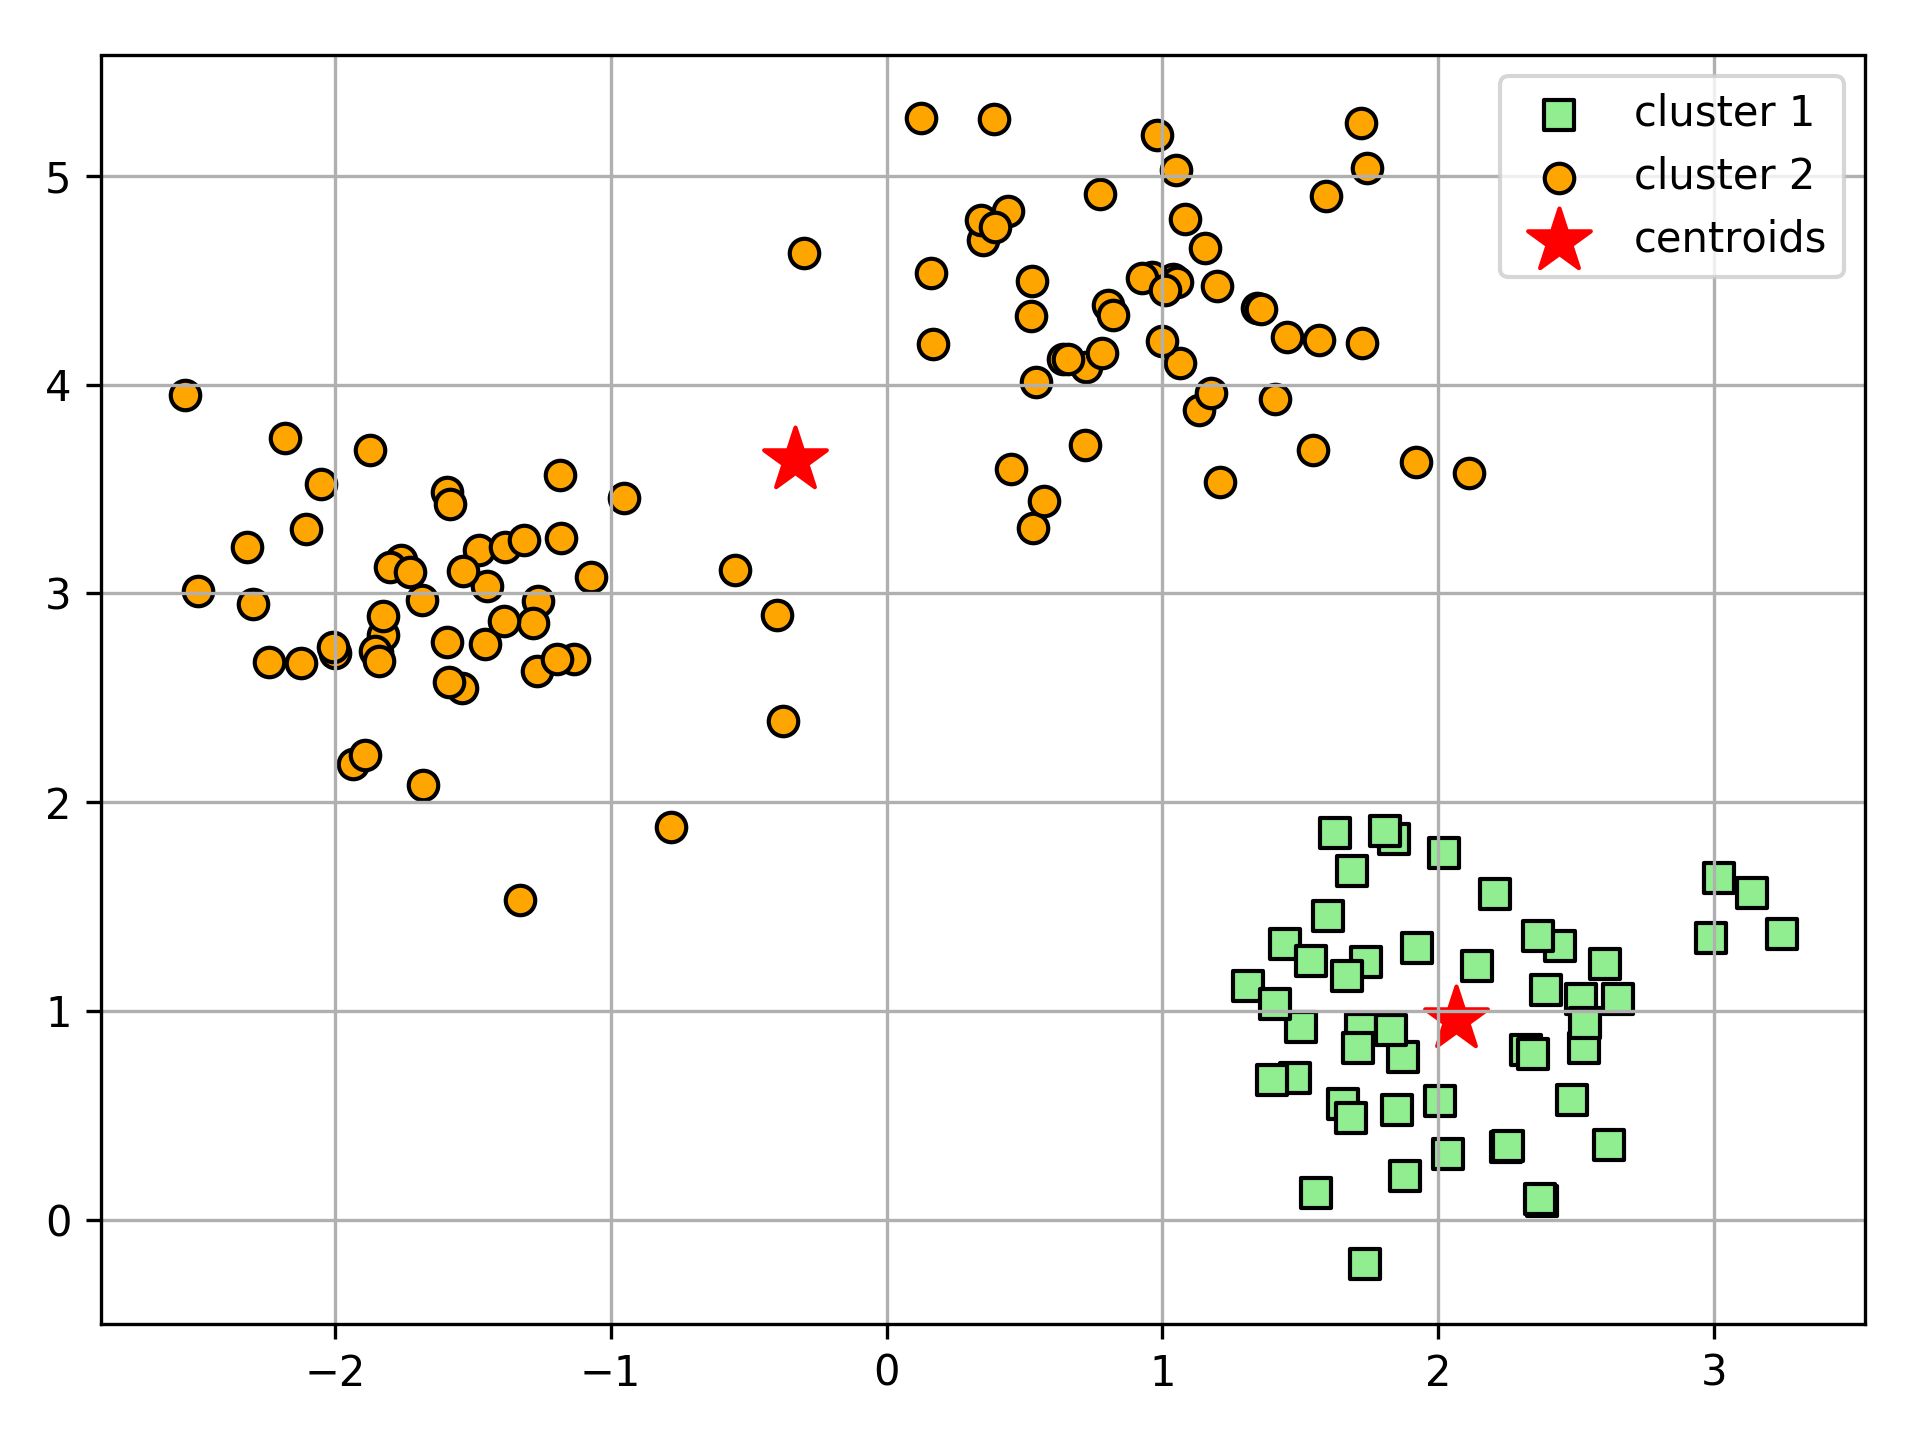

In [13]:
Image(filename='D:/Python/2. Nivel II/1/imagenes/01_01.png', width=400) 

In [48]:
import pandas as pd
import numpy as np

In [49]:
np.random.seed(123)

variables = ['X', 'Y', 'Z'] #variables
labels = ['ID_0', 'ID_1', 'ID_2', 'ID_3', 'ID_4'] #valores

X = np.random.random_sample([5, 3])*10
df = pd.DataFrame(X, columns=variables, index=labels)
df

,X,Y,Z
ID_0,6.964692,2.861393,2.268515
ID_1,5.513148,7.194690,4.231065
ID_2,9.807642,6.848297,4.809319
ID_3,3.921175,3.431780,7.290497
ID_4,4.385722,0.596779,3.980443


<br>

##### Realizando agrupamiento jerárquico sobre una matriz de distancia

In [1]:
from scipy.spatial.distance import pdist, squareform

In [23]:
row_dist = pd.DataFrame(squareform(pdist(df, metric='euclidean')),
                        columns=labels,
                        index=labels)
row_dist

,ID_0,ID_1,ID_2,ID_3,ID_4
ID_0,0.000000,4.973534,5.516653,5.899885,3.835396
ID_1,4.973534,0.000000,4.347073,5.104311,6.698233
ID_2,5.516653,4.347073,0.000000,7.244262,8.316594
ID_3,5.899885,5.104311,7.244262,0.000000,4.382864
ID_4,3.835396,6.698233,8.316594,4.382864,0.000000


Podemos pasar una matriz de distancia condensed (triangular superior) desde la función `pdist`, o podemos pasar la matriz de datos "original" y definir el argumento` metric = 'euclidean'` en `linkage`. Sin embargo, no deberíamos pasar la matriz de distancia de forma cuadrada, que produciría diferentes valores de distancia, aunque la agrupación general podría ser la misma.

In [24]:
from scipy.cluster.hierarchy import linkage

In [19]:
# 1. enfoque incorrecto: matriz de distancia de forma cuadrada
row_clusters = linkage(row_dist, method='complete', metric='euclidean')
pd.DataFrame(row_clusters,
             columns=['row label 1', 'row label 2',
                      'distance', 'no. of items in clust.'],
             index=['cluster %d' % (i + 1)
                    for i in range(row_clusters.shape[0])])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  


,row label 1,row label 2,distance,no. of items in clust.
cluster 1,0.0,4.0,6.521973,2.0
cluster 2,1.0,2.0,6.729603,2.0
cluster 3,3.0,5.0,8.539247,3.0
cluster 4,6.0,7.0,12.444824,5.0


In [25]:
# 2. enfoque correcto: matriz de distancia condensed (condensada)
row_clusters = linkage(pdist(df, metric='euclidean'), method='complete')
pd.DataFrame(row_clusters,
             columns=['row label 1', 'row label 2',
                      'distance', 'no. of items in clust.'],
             index=['cluster %d' % (i + 1) 
                    for i in range(row_clusters.shape[0])])

,row label 1,row label 2,distance,no. of items in clust.
cluster 1,0.0,4.0,3.835396,2.0
cluster 2,1.0,2.0,4.347073,2.0
cluster 3,3.0,5.0,5.899885,3.0
cluster 4,6.0,7.0,8.316594,5.0


In [26]:
# 3. enfoque correcto: matriz de muestra imput
row_clusters = linkage(df.values, method='complete', metric='euclidean')
pd.DataFrame(row_clusters,
             columns=['row label 1', 'row label 2',
                      'distance', 'no. of items in clust.'],
             index=['cluster %d' % (i + 1)
                    for i in range(row_clusters.shape[0])])

,row label 1,row label 2,distance,no. of items in clust.
cluster 1,0.0,4.0,3.835396,2.0
cluster 2,1.0,2.0,4.347073,2.0
cluster 3,3.0,5.0,5.899885,3.0
cluster 4,6.0,7.0,8.316594,5.0


In [27]:
from scipy.cluster.hierarchy import dendrogram

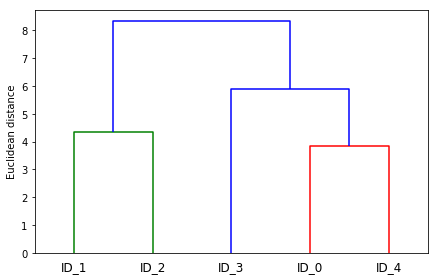

In [28]:
# realizar dendograma clásico-negro (part 1/2)
#from scipy.cluster.hierarchy import set_link_color_palette
#set_link_color_palette(['black'])

row_dendr = dendrogram(row_clusters, 
                       labels=labels,
                       # realizar dendograma clásico-negro (part 2/2)
                       # color_threshold=np.inf
                       )
plt.tight_layout()
plt.ylabel('Euclidean distance')
plt.show()

<br>

##### Dendograma en un mapa de calor

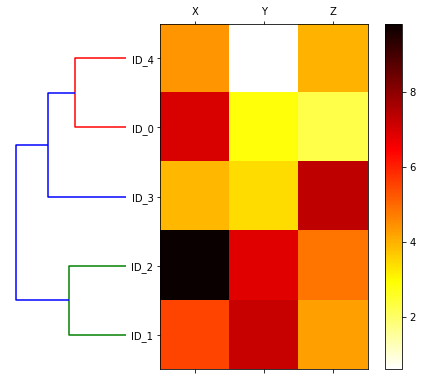

In [29]:
# dendograma de fila
fig = plt.figure(figsize=(8, 8), facecolor='white')
axd = fig.add_axes([0.09, 0.1, 0.2, 0.6])

# nota: for matplotlib < v1.5.1, usar orientation='right'
row_dendr = dendrogram(row_clusters, orientation='left')

# reordenar datos con respecto a la aplicación
df_rowclust = df.iloc[row_dendr['leaves'][::-1]]

axd.set_xticks([])
axd.set_yticks([])

# remover eje del dendograma
for i in axd.spines.values():
    i.set_visible(False)

# mapa de calor
axm = fig.add_axes([0.23, 0.1, 0.6, 0.6])  # x-pos, y-pos, width, height
cax = axm.matshow(df_rowclust, interpolation='nearest', cmap='hot_r')
fig.colorbar(cax)
axm.set_xticklabels([''] + list(df_rowclust.columns))
axm.set_yticklabels([''] + list(df_rowclust.index))

#plt.savefig('images/11_12.png', dpi=300)
plt.show()

<br>

##### Aplicación de agrupamiento aglomerativo con  scikit-learn

In [30]:
from sklearn.cluster import AgglomerativeClustering

In [31]:
ac = AgglomerativeClustering(n_clusters=3, 
                             affinity='euclidean', 
                             linkage='complete')
labels = ac.fit_predict(X)
print('Cluster labels: %s' % labels)

Cluster labels: [1 0 0 2 1]


In [32]:
ac = AgglomerativeClustering(n_clusters=2, 
                             affinity='euclidean', 
                             linkage='complete')
labels = ac.fit_predict(X)
print('Cluster labels: %s' % labels)

Cluster labels: [0 1 1 0 0]


<br>
<br>

<a id='part3'></a>
## Localización de regiones de alta densidad a través de DBSCAN

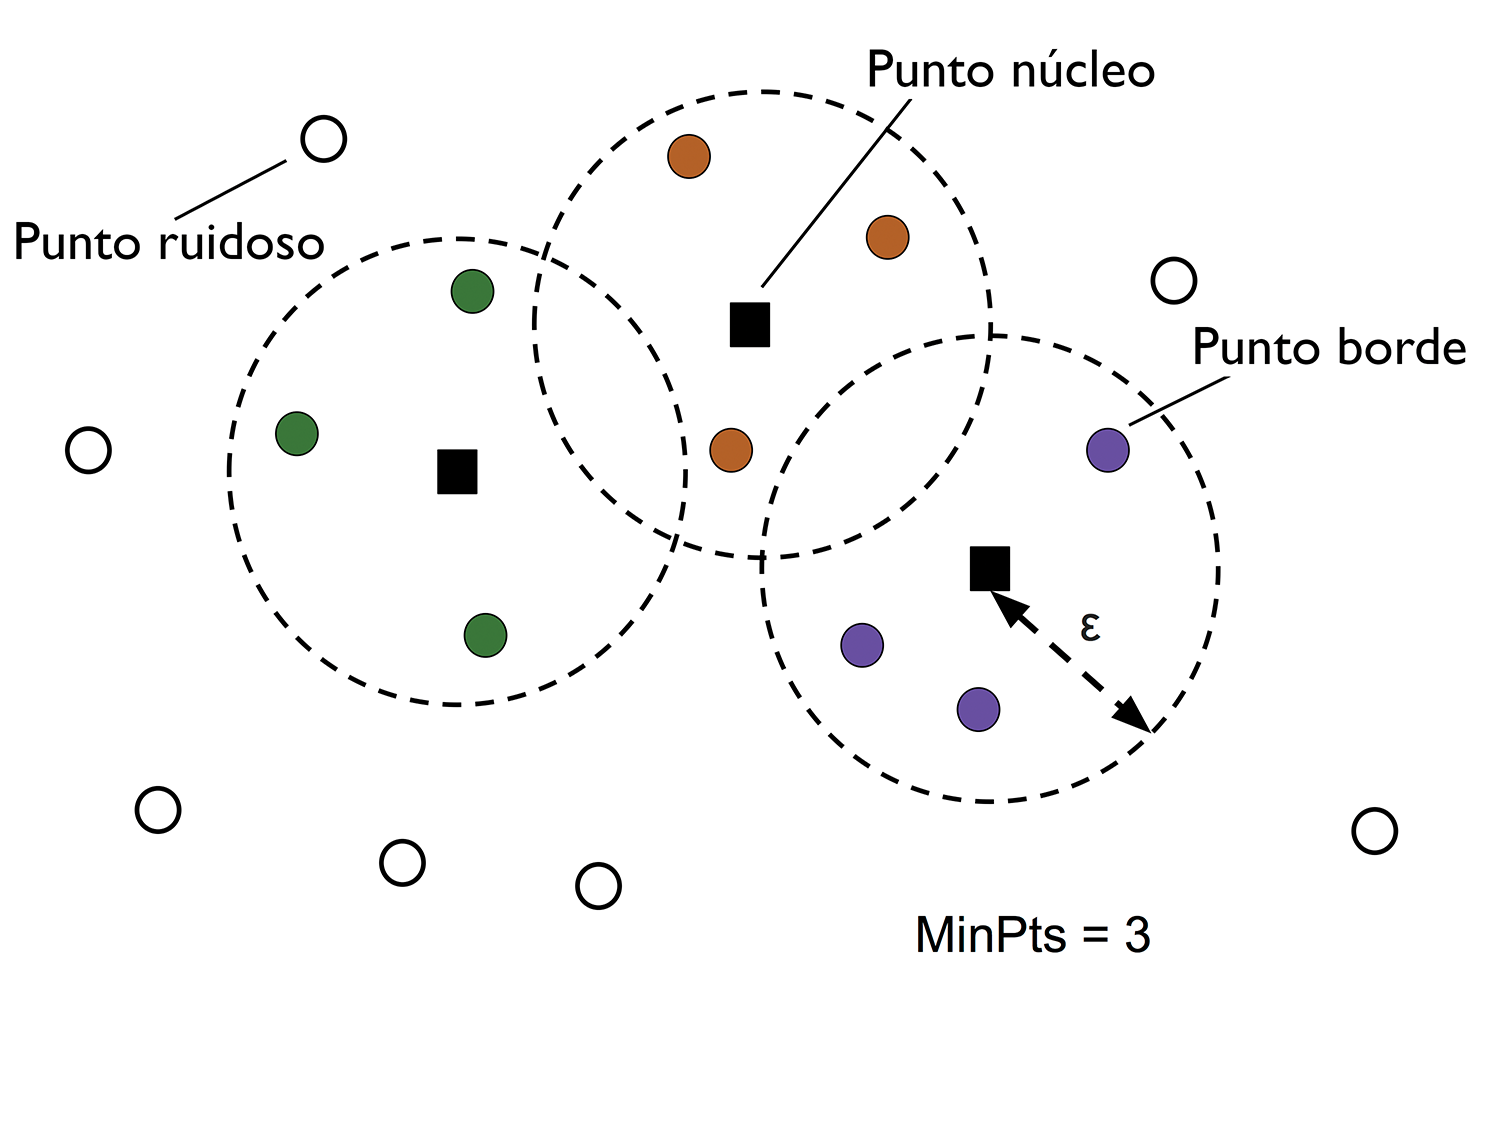

In [33]:
Image(filename='D:/Python/2. Nivel II/1/imagenes/01_02.png', width=500) 

In [34]:
from sklearn.datasets import make_moons

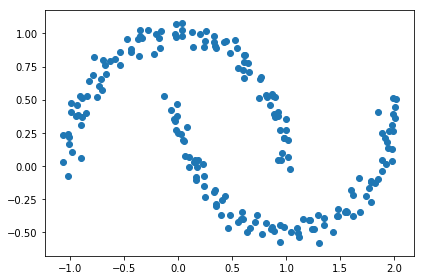

In [35]:
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)
plt.scatter(X[:, 0], X[:, 1])
plt.tight_layout()
#plt.savefig('images/11_14.png', dpi=300)
plt.show()

K-means y agrupamiento jerárquico:

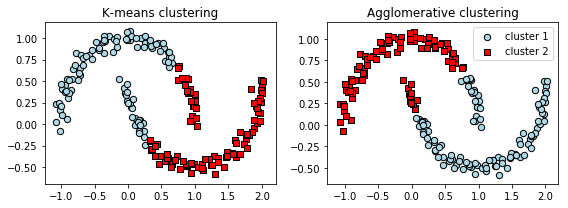

In [36]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 3))

km = KMeans(n_clusters=2, random_state=0)
y_km = km.fit_predict(X)
ax1.scatter(X[y_km == 0, 0], X[y_km == 0, 1],
            edgecolor='black',
            c='lightblue', marker='o', s=40, label='cluster 1')
ax1.scatter(X[y_km == 1, 0], X[y_km == 1, 1],
            edgecolor='black',
            c='red', marker='s', s=40, label='cluster 2')
ax1.set_title('K-means clustering')

ac = AgglomerativeClustering(n_clusters=2,
                             affinity='euclidean',
                             linkage='complete')
y_ac = ac.fit_predict(X)
ax2.scatter(X[y_ac == 0, 0], X[y_ac == 0, 1], c='lightblue',
            edgecolor='black',
            marker='o', s=40, label='cluster 1')
ax2.scatter(X[y_ac == 1, 0], X[y_ac == 1, 1], c='red',
            edgecolor='black',
            marker='s', s=40, label='cluster 2')
ax2.set_title('Agglomerative clustering')

plt.legend()
plt.tight_layout()
plt.show()

Agrupación basada en clúster:

In [38]:
from sklearn.cluster import DBSCAN

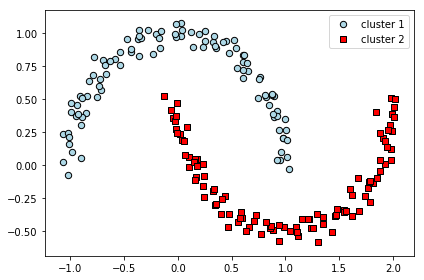

In [39]:
db = DBSCAN(eps=0.2, min_samples=5, metric='euclidean')
y_db = db.fit_predict(X)
plt.scatter(X[y_db == 0, 0], X[y_db == 0, 1],
            c='lightblue', marker='o', s=40,
            edgecolor='black', 
            label='cluster 1')
plt.scatter(X[y_db == 1, 0], X[y_db == 1, 1],
            c='red', marker='s', s=40,
            edgecolor='black', 
            label='cluster 2')
plt.legend()
plt.tight_layout()
plt.show()

<br>
<br>